final project notebook

Question: What makes someone successful at the Monaco Grand Prix

In [1]:
#Import the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat

In [8]:
#Import the two datasets (race.csv and results.csv)
Races=pd.read_csv("data_raw/races.csv")
Results=pd.read_csv("data_raw/results.csv")
Drivers=pd.read_csv("data_raw/drivers.csv")


In [6]:
#Merge the data in order to have the location included 
MergedData=pd.merge(Results,Races,how="left",on="raceId")

In [7]:
MergedData.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [9]:
#Merge the data in order to have the name included
FinalMerge=pd.merge(MergedData,Drivers,how="left",on="driverId")

In [10]:
FinalMerge.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692,1990.251780,8.385991,23.486920
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476,19.345632,4.958210,18.569371
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000,1990.000000,8.000000,18.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000


In [12]:
FinalMerge=FinalMerge.sort_values(by=["surname","year"],ascending=True)

In [15]:
MonacoMerged=FinalMerge.query("name == 'Monaco Grand Prix'")

In [43]:
Monaco_agg1 = (MonacoMerged
                       .groupby(["surname"])
                       .agg(average_points = ('points','mean'),
                            average_grid=('grid','mean'))
                       .sort_values("average_points",ascending=False))

display(Monaco_agg1)

,average_points,average_grid
surname,,
Vettel,12.785714,5.357143
Hamilton,11.533333,5.400000
Ricciardo,8.500000,7.300000
Sainz,8.285714,5.000000
Norris,8.000000,7.333333
...,...,...
Jabouille,0.000000,12.000000
Ireland,0.000000,4.000000
Inoue,0.000000,26.000000


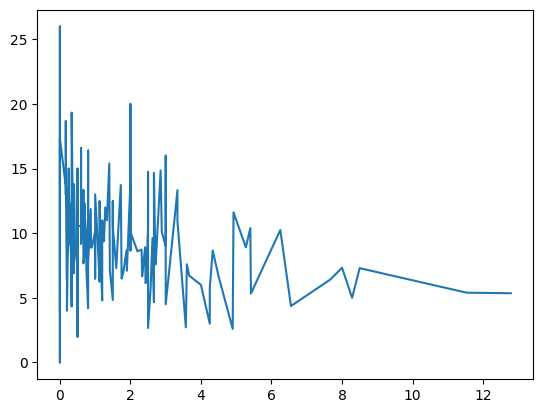

In [44]:
mat.plot("average_points","average_grid",data=Monaco_agg1)

In [49]:
Monaco_agg2 = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean'))
                       .sort_values("average_points",ascending=False))


display(Monaco_agg2)

,average_points
grid,
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
9,2.114286
8,1.895522
7,1.500000


In [53]:
MonacoTest = (MonacoMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(MonacoTest)
numberlist=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
MonacoTest["Grid_Position"]=numberlist
display(MonacoTest)


,average_points
grid,
0,0.004405
1,7.166667
2,5.970588
3,5.441176
4,4.080882
5,3.608696
6,2.159420
7,1.500000
8,1.895522


,average_points,Grid_Position
grid,,
0,0.004405,0
1,7.166667,1
2,5.970588,2
3,5.441176,3
4,4.080882,4
5,3.608696,5
6,2.159420,6
7,1.500000,7
8,1.895522,8


<BarContainer object of 28 artists>

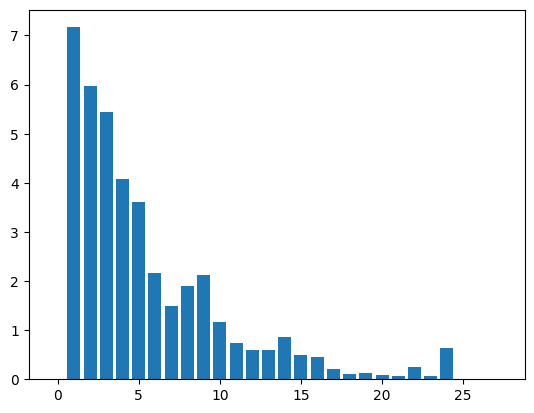

In [54]:
mat.bar(x="Grid_Position",height="average_points",data=MonacoTest)



,average_points
grid,
0,0.000000
1,6.300000
2,5.324324
3,5.589041
4,3.837838
5,3.253425
6,3.283784
7,2.171053
8,2.081081


,average_points,Grid_Position
grid,,
0,0.000000,0
1,6.300000,1
2,5.324324,2
3,5.589041,3
4,3.837838,4
5,3.253425,5
6,3.283784,6
7,2.171053,7
8,2.081081,8


<BarContainer object of 33 artists>

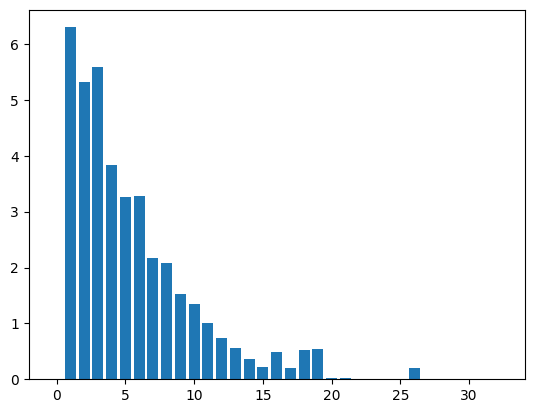

In [56]:
ItalianMerged=FinalMerge.query("name == 'Italian Grand Prix'")

ItalianTest = (ItalianMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(ItalianTest)
numberlist=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
ItalianTest["Grid_Position"]=numberlist
display(ItalianTest)

mat.bar(x="Grid_Position",height="average_points",data=ItalianTest)


,average_points
grid,
0,0.000000
1,6.428571
2,5.129032
3,3.903226
4,3.460317
5,2.419355
6,2.171875
7,2.015873
8,0.919355


,average_points,Grid_Position
grid,,
0,0.000000,0
1,6.428571,1
2,5.129032,2
3,3.903226,3
4,3.460317,4
5,2.419355,5
6,2.171875,6
7,2.015873,7
8,0.919355,8


<BarContainer object of 28 artists>

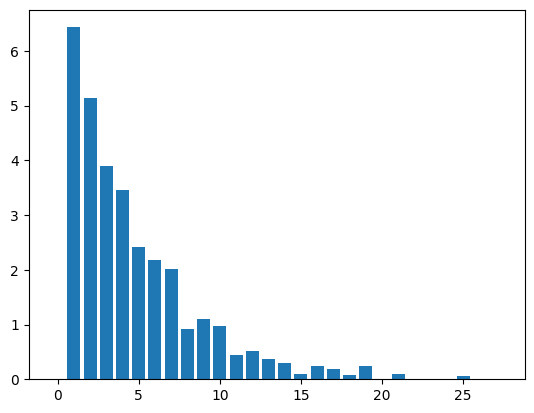

In [60]:
FrenchMerged=FinalMerge.query("name == 'French Grand Prix'")

FrenchTest = (FrenchMerged
                       .groupby(["grid"])
                       .agg(average_points = ('points','mean')))

display(FrenchTest)
numberlist=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
FrenchTest["Grid_Position"]=numberlist
display(FrenchTest)

mat.bar(x="Grid_Position",height="average_points",data=FrenchTest)